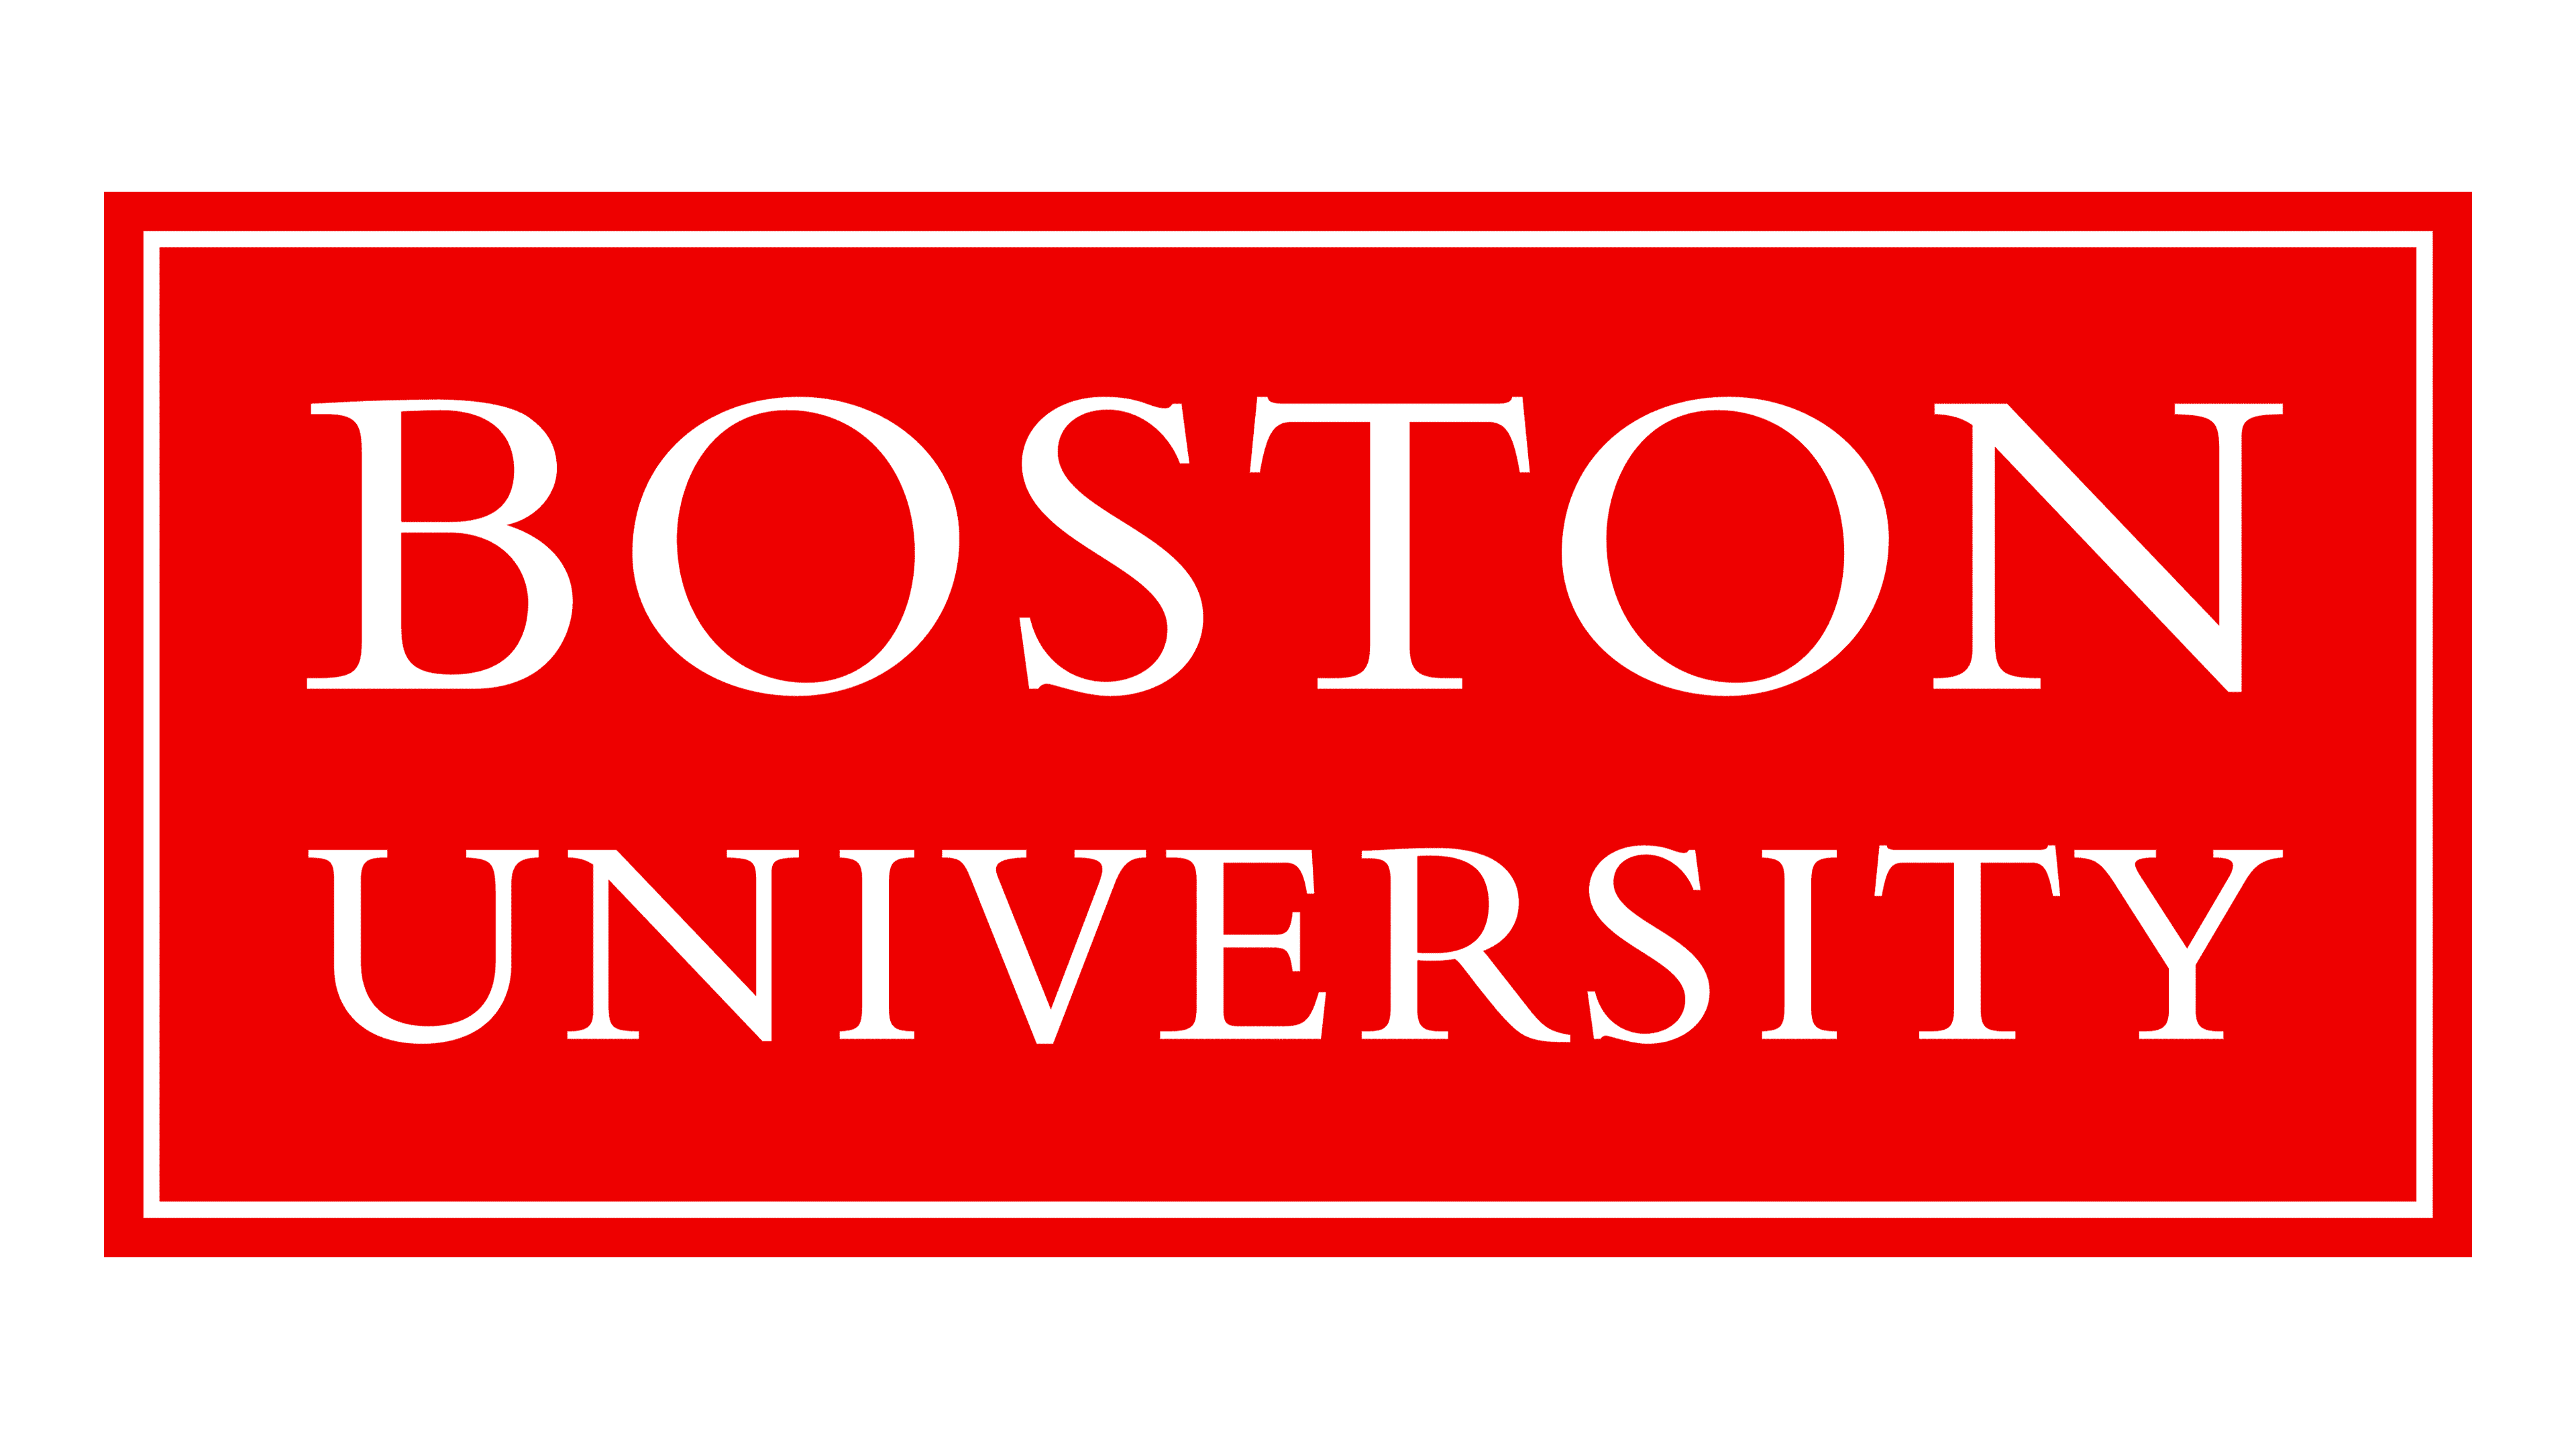


# <div style="text-align: center"> <h2>Assignment - 2</div>

# <div style="text-align: center"> <h4>AD654 A3 Marketing Analytics (Spring 2024)</div>

# <div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

#### Solution - I: SEGMENTATION

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("lobster_fans.csv")

##### Solution - A

In [3]:
# Looking at the dataframe
df.head()

,guestID,homestate,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
0,1,New Hampshire,9,73.48,234.2,5.2,4.6,234.9,3,97.0,134.3
1,2,New York,21,23.17,179.9,13.3,3.4,273.9,2,40.1,164.2
2,3,Massachusetts,11,61.00,180.7,7.4,4.9,233.6,2,109.8,201.1
3,4,Rhode Island,15,63.46,65.6,8.2,3.7,252.8,6,121.5,296.4
4,5,NaN,18,82.00,249.4,9.4,4.7,311.3,6,50.6,109.5


In [4]:
df.tail()

,guestID,homestate,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
649,650,Maine,6,7.49,70.2,4.7,2.3,324.3,2,105.5,242.3
650,651,Massachusetts,9,72.73,143.1,8.6,2.9,186.0,4,71.4,421.9
651,652,Maine,12,70.63,139.8,11.5,3.4,264.4,4,129.2,40.4
652,653,Vermont,10,4.11,253.0,6.7,5.4,321.5,4,142.9,170.3
653,654,Maine,17,75.87,225.1,10.0,4.7,304.2,2,164.7,246.1


In [5]:
df.drop(columns=['guestID'], inplace=True)

In [6]:
df.head()

,homestate,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
0,New Hampshire,9,73.48,234.2,5.2,4.6,234.9,3,97.0,134.3
1,New York,21,23.17,179.9,13.3,3.4,273.9,2,40.1,164.2
2,Massachusetts,11,61.00,180.7,7.4,4.9,233.6,2,109.8,201.1
3,Rhode Island,15,63.46,65.6,8.2,3.7,252.8,6,121.5,296.4
4,NaN,18,82.00,249.4,9.4,4.7,311.3,6,50.6,109.5


> **💡Interpretation of Result💡-**
>
> Euclidean distance between any two records found by first squaring each of the pairwise difference between those records, summing those squares, and then taking the square root of that sum. Presence of a categorical variable like "guestID" doesn't contribute to the calculation of distance between data points because it lacks intrinsic numerical significance or relationship with other attributes, thus offerening no meaningful contribution. 
>
> Instead, it would introduce noice and potentially mislead the clustering algorithm. Hence, dropping "guestID" is appropriate choice to ensure the clustering algorithm focuses on relevant numerical features that determine similarity between data points.

##### Solution - B

In [7]:
df.describe()

,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,11.836391,50.196544,209.648012,7.971101,3.932416,249.399694,3.223242,111.804281,253.361927
std,3.427547,28.479854,52.935538,2.675573,1.547469,35.977300,1.776746,27.588283,111.859099
min,3.000000,1.020000,65.500000,0.000000,-1.300000,163.900000,0.000000,21.300000,-111.700000
25%,10.000000,25.845000,175.250000,6.200000,2.825000,224.700000,2.000000,92.425000,180.550000
50%,12.000000,49.950000,209.700000,7.900000,4.000000,247.400000,3.000000,112.350000,253.050000
75%,14.000000,74.595000,247.300000,9.800000,5.000000,272.475000,4.000000,131.700000,325.550000
max,24.000000,98.690000,367.400000,17.300000,8.600000,392.000000,11.000000,186.000000,676.400000


> **💡Interpretation of Result💡-**
>
> The `describe()` function is used to get some basic summary statistics of the data in a dataframe. By looking at these summary statistics, an analyst can get a quick sense of the following:
> 
>**Central tendancies & spread:**
>
>**Mean:** Gives the idea of center of the data. The average nummber of visits in 2023 is 11.84.
>
>**Standard Deviation:** This indicates how spead out data is from Mean. High standard deviation - rides on dry days suggests that the values are more diverse, while a low standard deviation - referral codes implies the values are closer to the mean
>
>**Potential Outliers:**
>
>**Minmum and Maximum:** These reveal the extreame values that might be outliers or errors. Eg: Minimum value of -1.3 for dry rides might indicate data entry issues.
>
>**Data Distribution:**
>
>**Percentiles:** These values divide the data into specific proportions. The 25th (Quarter 1) and 75th (Quarter 3) represents lower and uper quarters of the data. The 50th (Quarter 2) percentile is the median. By comparing we can understand if the data is skewed towards one side - Dry rides seem to be skewed towards lower end.

##### Solution - C

In [8]:
# Missing Values
df.isnull().sum()

homestate            62
visits_2023           0
social_pres           0
avg_duration          0
avg_rides_dry         0
avg_rides_water       0
total_merch           0
referral_codes        0
total_snack_shack     0
total_goldzone        0
dtype: int64

In [9]:
# Reconfirm presence of NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   homestate          592 non-null    object 
 1   visits_2023        654 non-null    int64  
 2   social_pres        654 non-null    float64
 3   avg_duration       654 non-null    float64
 4   avg_rides_dry      654 non-null    float64
 5   avg_rides_water    654 non-null    float64
 6   total_merch        654 non-null    float64
 7   referral_codes     654 non-null    int64  
 8   total_snack_shack  654 non-null    float64
 9   total_goldzone     654 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 51.2+ KB


In [10]:
df.homestate.describe()

count               592
unique                7
top       Massachusetts
freq                165
Name: homestate, dtype: object

In [11]:
df.groupby('homestate')['homestate'].count()

homestate
Connecticut       46
Maine            160
Massachusetts    165
New Hampshire     53
New York          43
Rhode Island      52
Vermont           73
Name: homestate, dtype: int64

In [12]:
df.drop(columns=['homestate'], inplace=True)

> **💡Interpretation of Result💡-**
>
> **a] Missing Values-**
>
> Yes, the dataset contains missing values. 'homestate' has about 62 missing (NaN) values.
>
>**Addressing Missing Values:**
>
> Replacing missing values with values like 'Maine' or 'Massachusetts' (even if they have the highest frequencies) is not recommended because it introdues bias and misrepresents the actual data.
>
> It is also not acceptable to exclue the rows containing missing values, as it will result in loss of data. As the coloumn `homestate` is not required for the scope of this assignment so I am dropping the whole column.

In [13]:
df.describe()

,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,11.836391,50.196544,209.648012,7.971101,3.932416,249.399694,3.223242,111.804281,253.361927
std,3.427547,28.479854,52.935538,2.675573,1.547469,35.977300,1.776746,27.588283,111.859099
min,3.000000,1.020000,65.500000,0.000000,-1.300000,163.900000,0.000000,21.300000,-111.700000
25%,10.000000,25.845000,175.250000,6.200000,2.825000,224.700000,2.000000,92.425000,180.550000
50%,12.000000,49.950000,209.700000,7.900000,4.000000,247.400000,3.000000,112.350000,253.050000
75%,14.000000,74.595000,247.300000,9.800000,5.000000,272.475000,4.000000,131.700000,325.550000
max,24.000000,98.690000,367.400000,17.300000,8.600000,392.000000,11.000000,186.000000,676.400000


In [14]:
df1 = df[(df['avg_rides_water'] > 0) & (df["total_goldzone"] > 0)]
df1.describe()

,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000,641.000000
mean,11.798752,50.285772,209.169423,7.973791,3.960218,249.229641,3.24025,111.894852,256.784243
std,3.413905,28.554836,53.097402,2.667847,1.503639,36.001470,1.77966,27.675529,107.507797
min,3.000000,1.020000,65.500000,0.000000,0.100000,163.900000,0.00000,21.300000,23.600000
25%,10.000000,25.820000,175.100000,6.200000,2.900000,224.400000,2.00000,92.300000,183.100000
50%,12.000000,50.130000,208.800000,7.900000,4.000000,247.200000,3.00000,112.600000,255.100000
75%,14.000000,74.940000,247.000000,9.700000,5.000000,272.400000,4.00000,131.700000,325.800000
max,24.000000,98.690000,367.400000,17.300000,8.600000,392.000000,11.00000,186.000000,676.400000


> **💡Interpretation of Result💡-**
>
> **b] Impossible Values-**
>
> Yes, the dataset contains impossible values. 'avg_rides_water' has minimum value of -1.3 & 'total_goldzone' has minimum value of -111.7. These values are irrelevant as number of rides cannot and spending cannot be negative.
>
>**Addressing Missing Values:**
>
> Filter out rows with negative values, to ensure dataset only contains valid data and improve quality of analysis.

##### Solution - D

> **💡Solution💡-**
>
> **a] Standardization of Variables-**
>For distance -based algorithms like k-means clustering which is the next question, standardization is required. These algorithms rely on Euclidean distance between data points, and variables with significantly different scales can unfairly dominate the distance calculations. Standardization helps mitigate this issue by putting all variables like amount spent - "total_goldzone" or time - "avg_duration" or count - "visits_2023" and so on, on a similar scale (typically with mean = 0 and std = 1).


In [15]:
# Solution b ] Standardization
from sklearn.preprocessing import StandardScaler

zscore = StandardScaler()
df2 = zscore.fit_transform(df1)
df2 = pd.DataFrame(df2, columns=df1.columns)

df2

,visits_2023,social_pres,avg_duration,avg_rides_dry,avg_rides_water,total_merch,referral_codes,total_snack_shack,total_goldzone
0,-0.820450,0.812904,0.471777,-1.040523,0.425821,-0.398340,-0.135103,-0.538616,-1.140195
1,2.697331,-0.950345,-0.551671,1.998004,-0.372866,0.685795,-0.697447,-2.596190,-0.861859
2,-0.234153,0.375509,-0.536592,-0.215244,0.625493,-0.434478,-0.697447,-0.075752,-0.518360
3,0.938441,0.461726,-2.705999,0.084857,-0.173194,0.099250,1.551929,0.347334,0.368780
4,1.817886,1.111510,0.758267,0.535009,0.492378,1.725453,1.551929,-2.216497,-1.371056
...,...,...,...,...,...,...,...,...,...
636,-1.699895,-1.499893,-2.619299,-1.228087,-1.104996,2.086831,-0.697447,-0.231246,-0.134833
637,-0.820450,0.786618,-1.245278,0.234908,-0.705652,-1.757679,0.427241,-1.464343,1.537049
638,0.058996,0.713018,-1.307476,1.322776,-0.372866,0.421711,0.427241,0.625775,-2.014303
639,-0.527301,-1.618354,0.826120,-0.477833,0.958279,2.008996,0.427241,1.121184,-0.805074


> **💡Interpretation of Code💡-**
>
> Data Standardization is conducted using `StandardScaler` from `sklearn.preprocessing` library to fit the data in `df2`. This process centers the data (subtracts the mean) and scales it to unit variance (divides by the standard deviation). 
>
> **💡Interpretation of Results💡-**
> The output shows a DataFrame `df2` with the standardized features and their corresponding z-scores. Each value in the DataFrame represents the number of standard deviations a particular data point is away from the mean for that feature. For example, a value of 0.193 in the "visits_2023" column indicates that the data point is 0.193 standard deviations below the mean for visits in 2023.

##### Solution - E

In [16]:
# k-means clustering model
from sklearn.cluster import KMeans

# 5 variables for k-means clustering
variables = ['visits_2023','avg_duration','avg_rides_dry', 'total_snack_shack','total_goldzone']

# KMean model
kmeans = KMeans(n_clusters=3, random_state =42)

# Fit the model to standardized dataframe
kmeans.fit(df2[variables])

# Predict cluster labels for each datapoint
df2['cluster'] = kmeans.labels_
df3 = df2.assign(Cluster = df2['cluster'])
df3.groupby(['Cluster']).agg({
'visits_2023':'mean',
'avg_duration':'mean',
'avg_rides_dry':'mean', 
'total_snack_shack':'mean',
'total_goldzone':'mean'
}).round(2)


C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,visits_2023,avg_duration,avg_rides_dry,total_snack_shack,total_goldzone
Cluster,,,,,
0,-0.12,0.52,-0.33,0.71,-0.31
1,0.04,-0.79,-0.35,-0.14,0.80
2,0.12,0.16,0.82,-0.79,-0.45


C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


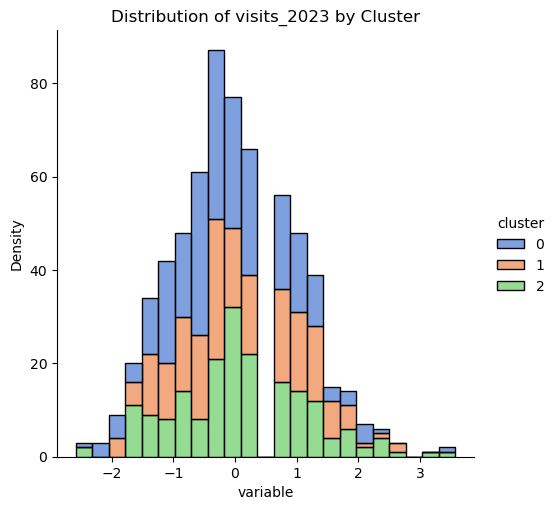

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


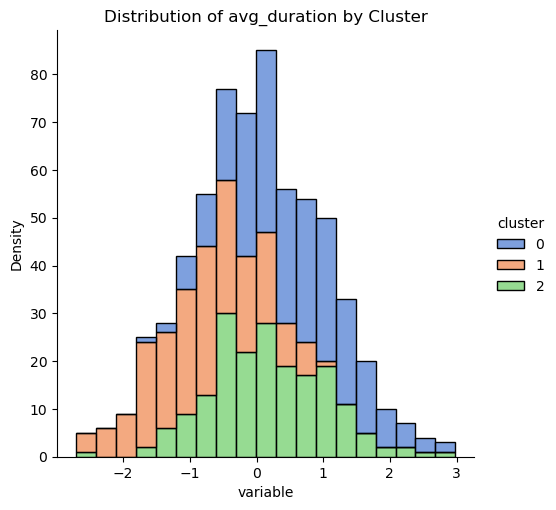

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


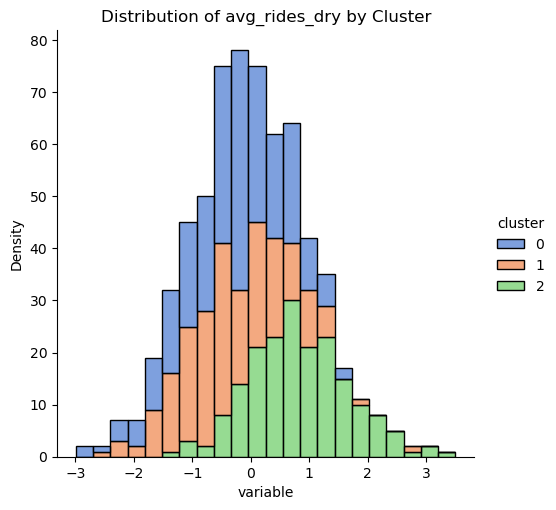

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


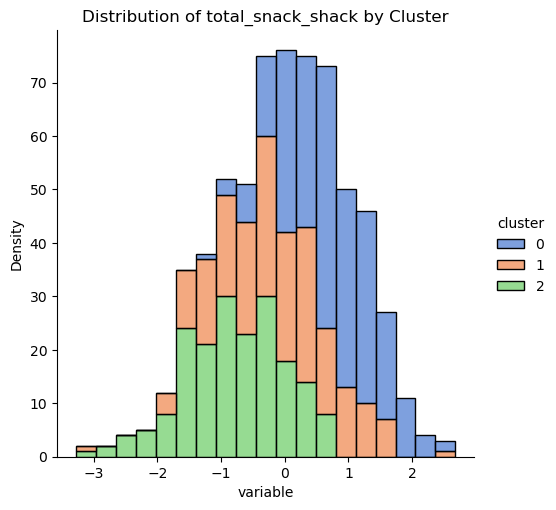

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


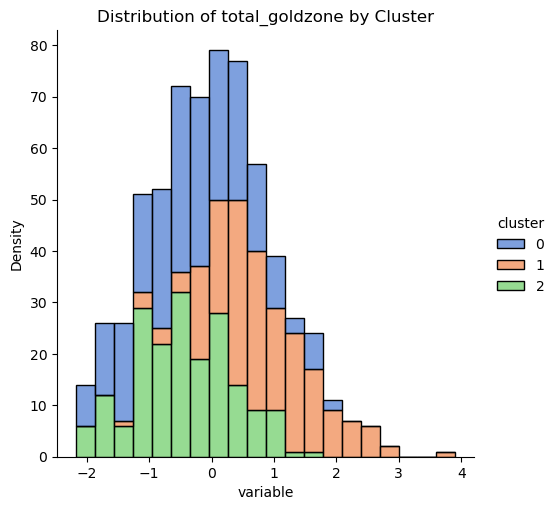

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

for variable in variables:
    sns.displot(data = df3, x=variable, hue='cluster', kind='hist', palette = 'muted', alpha=0.7, multiple='stack')
    plt.title(f'Distribution of {variable} by Cluster')
    plt.xlabel('variable')
    plt.ylabel('Density')
    plt.show()
    

> **💡Interpretation💡-**
>
> **Reason for variable selection**
> visits_2023 - Captures overall visits, potentially indicating cluster differences in volume.
>
> avg_duration - Reflects visitor engagement, potentially separating high-engagement clusters from casual visits.
>
> avg_rides_dry - Represents usage of non water rides, potentially showing clusters with a preference of dry rides attractions.
>
> total_snack_shack - Indicates spending behavior, potentially distinguishing clusters with higher spending habits.
>
> total_goldzone - Reflects VIP access utilization, potentially distinguishing clusters based on VIP usage.

> **💡Interpretation of Results💡-**
>
> **Cluster 0 - "Young Family with children"**
>
> This cluster might represent families with young children. They have **Higher overall visits** throughout the year, for potentially shorter durations with their children probably on weekends. **Moderate engagement** probably because of children they limit extended ride times. **Moderate dry ride usage** prefer both dry and water rides. **High spending at the snack shack** purchase food and drinks for the family throughout the day. **Potentially lower VIP usage** focuses on family time and affordability, potentially opting out of VIP access.
>
> **Cluster 1 - "Season pass holders / frequent visitors"**
>
> This cluster might represent season pass holders or frequent visitors. They are probably in their early 20s and are couples. **Moderate to high overall visits** through out the season. **Higher engagement -** spending more time enjoying rides and attractions compared to other clusters. **Moderate dry ride usage** likely enjoying variety of rides, including ones. **Moderate spending at the snack shack** purchase food and drinks during their visit. **Variable VIP usage** Some might utilize VIP access for shorter wait times or exclusive benefits, while other might not.
>
>**Cluster 2 - "Visitors on budget"**
>
>Casual visitors or visitors on a budget. **Lower overall visits** Less frequent visits to the park. **Lower engagement** Spending shorter periods at the part, only in for few rides. **Lower dry ride usage** Might prioritize specific rides or attractions. **Lower spending at the snack shack** spending less on food and drinks due to budget or shorter visits. **Low VIP usage** Less likely to utilize VIP access due to cost or not needing it for shorter visits.

##### Solution - F

C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

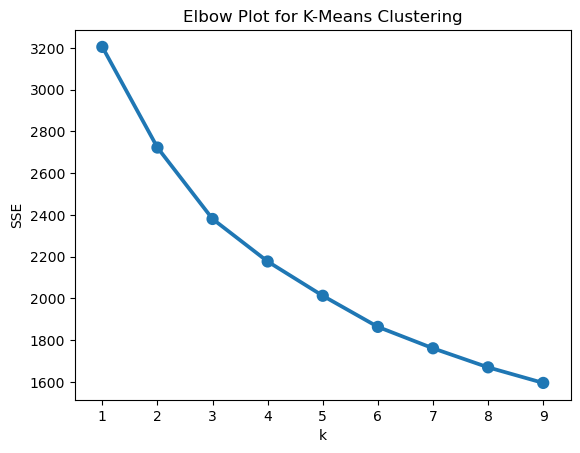

In [18]:
# Elbow Plot

sse = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(df2[variables])
    sse[k] = kmeans.inertia_
    
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Plot for K-Means Clustering')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

> **💡Interpretation of Code💡-**
>
> **Step 1:** Define the range.
> 
> **Step 2:** Initialize empty list named'sse'. This list will store the inertia values calulated for each value of K. Inertia is sum of squared distances of samples to their closest cluster center.
>
> **Step 3:** Looping over K Range.
>
> **Step 4:** For each value of K, K-Means Clustering is performed using `KMeans`. The `fit` methon is called on KMeans object with the dataset(`df2`) and the variable (`k`).
>
>**Step 5:** Calculate SSE. After fittling the KMeans, the `sse`(inertia) of the clusters is computed using `inertia_`.
>
>**Step 6:** Elbow Plot. After iterating over all values of K, plot an elbow plot using `sns.pointplot()`. The x-axis represents the number of cluster (K), and the y-axis represents the SSE - Sum of Squared Errors. 

##### Solution - G
> **💡Interpretation of Graph💡-** 
>
>From the graph we can see that **K = 6** is the optimual number of clusters for K-Means clustering.  More than 6 clusters wouldn't provide a significant improvement in terms of reducing SSE, and might lead to overfitting the data.
>
> The elbow plot helps visually assess the optimal number of clusters for the K-Means model. By identifying the 'elbow point' where the rate of decrese in the SSE slows down. This point is the optimal number of clusters for the dataset(`df2`). 
>

##### Solution - H

In [19]:
# k-means clustering model
from sklearn.cluster import KMeans

# 5 variables for k-means clustering
variables = ['visits_2023','avg_duration','avg_rides_dry', 'total_snack_shack','total_goldzone']

# KMean model
kmeans = KMeans(n_clusters=6, random_state =42)

# Fit the model to standardized dataframe
kmeans.fit(df2[variables])

# Predict cluster labels for each datapoint
df2['cluster'] = kmeans.labels_
df3 = df2.assign(Cluster = df2['cluster'])
df3.groupby(['Cluster']).agg({
'visits_2023':'mean',
'avg_duration':'mean',
'avg_rides_dry':'mean', 
'total_snack_shack':'mean',
'total_goldzone':'mean'
}).round(2)


C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,visits_2023,avg_duration,avg_rides_dry,total_snack_shack,total_goldzone
Cluster,,,,,
0,-0.83,-0.65,0.18,0.77,-0.35
1,-0.25,-0.34,-0.44,-1.11,-0.39
2,1.19,-0.26,-0.38,0.52,-0.23
3,0.28,0.65,1.22,-0.35,-0.55
4,-0.36,1.06,-0.68,0.47,0.25
5,-0.01,-0.66,0.11,-0.24,1.45


##### Solution - I

In [20]:
# Summary Statistics

import pandas as pd

variables = ['visits_2023','avg_duration','avg_rides_dry', 'total_snack_shack','total_goldzone']

summary_statistics = df3.groupby('Cluster')[variables].describe().round(4)

pd.set_option('display.max_columns', None)
summary_statistics

visits_2023                                                          \
              count    mean     std     min     25%     50%     75%     max   
Cluster                                                                       
0             103.0 -0.8318  0.6941 -2.5793 -1.4067 -0.8204 -0.2342  0.3521   
1             112.0 -0.2525  0.7863 -2.5793 -0.8204 -0.2342  0.3521  1.5247   
2             104.0  1.1921  0.7111  0.0590  0.6453  1.2316  1.5247  3.5768   
3             113.0  0.2795  0.9091 -1.6999 -0.2342  0.0590  0.9384  2.6973   
4             114.0 -0.3550  0.7315 -1.9930 -0.8204 -0.2342  0.0590  1.2316   
5              95.0 -0.0120  0.8549 -1.9930 -0.5273  0.0590  0.6453  1.5247   

        avg_duration                                                          \
               count    mean     std     min     25%     50%     75%     max   
Cluster                                                                        
0              103.0 -0.6493  0.7276 -2.6193 -1.1454 -0.5894 -0.0908  1.4877   
1              112.0 -0.3378  0.7720 -2.7079 -0.7698 -0.3349  0.1693  1.5461   
2              104.0 -0.2621  0.7315 -2.0614 -0.6709 -0.1747  0.2239  1.4933   
3              113.0  0.6539  0.8282 -1.1058  0.0722  0.6885  1.1673  2.7543   
4              114.0  1.0574  0.6443 -0.2482  0.6937  0.9807  1.4010  2.9823   
5               95.0 -0.6576  0.8108 -2.7060 -1.1963 -0.5291 -0.1182  1.0504   

        avg_rides_dry                                                          \
                count    mean     std     min     25%     50%     75%     max   
Cluster                                                                         
0               103.0  0.1755  0.6913 -1.3406 -0.3278  0.1599  0.7976  1.5103   
1               112.0 -0.4397  0.7821 -2.2034 -0.9749 -0.4216  0.1224  1.2478   
2               104.0 -0.3826  0.8140 -2.9912 -0.8999 -0.3653  0.1599  1.3978   
3               113.0  1.2248  0.7050 -0.0277  0.6851  1.2102  1.6604  3.4985   
4               114.0 -0.6825  0.7400 -2.8786 -1.2187 -0.5904 -0.1777  0.7601   
5                95.0  0.1089  0.8918 -2.4660 -0.4966  0.1224  0.6288  2.6357   

        total_snack_shack                                                  \
                    count    mean     std     min     25%     50%     75%   
Cluster                                                                     
0                   103.0  0.7724  0.6647 -0.7086  0.2081  0.7632  1.2152   
1                   112.0 -1.1145  0.6598 -3.2760 -1.5647 -1.0865 -0.6064   
2                   104.0  0.5159  0.7607 -1.4246 -0.0107  0.5806  0.9621   
3                   113.0 -0.3526  0.8370 -2.9144 -0.9762 -0.2783  0.2425   
4                   114.0  0.4727  0.7916 -1.2727 -0.0269  0.4703  1.0299   
5                    95.0 -0.2361  0.8359 -3.0591 -0.8026 -0.2602  0.3582   

                total_goldzone                                          \
            max          count    mean     std     min     25%     50%   
Cluster                                                                  
0        2.6725          103.0 -0.3478  0.7643 -2.1707 -0.7706 -0.3070   
1        0.1159          112.0 -0.3884  0.8220 -2.0394 -1.0699 -0.3894   
2        2.0180          104.0 -0.2327  0.7761 -2.0422 -0.7232 -0.1423   
3        1.1610          113.0 -0.5519  0.7751 -2.1521 -1.1374 -0.5314   
4        2.6797          114.0  0.2457  0.7488 -1.6429 -0.2307  0.3092   
5        1.4466           95.0  1.4513  0.6300  0.3474  1.0064  1.3490   

                         
            75%     max  
Cluster                  
0        0.2031  1.6944  
1        0.2983  1.2913  
2        0.2785  1.8321  
3        0.0504  1.0185  
4        0.7470  1.9290  
5        1.7828  3.9062

##### Solution - J

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


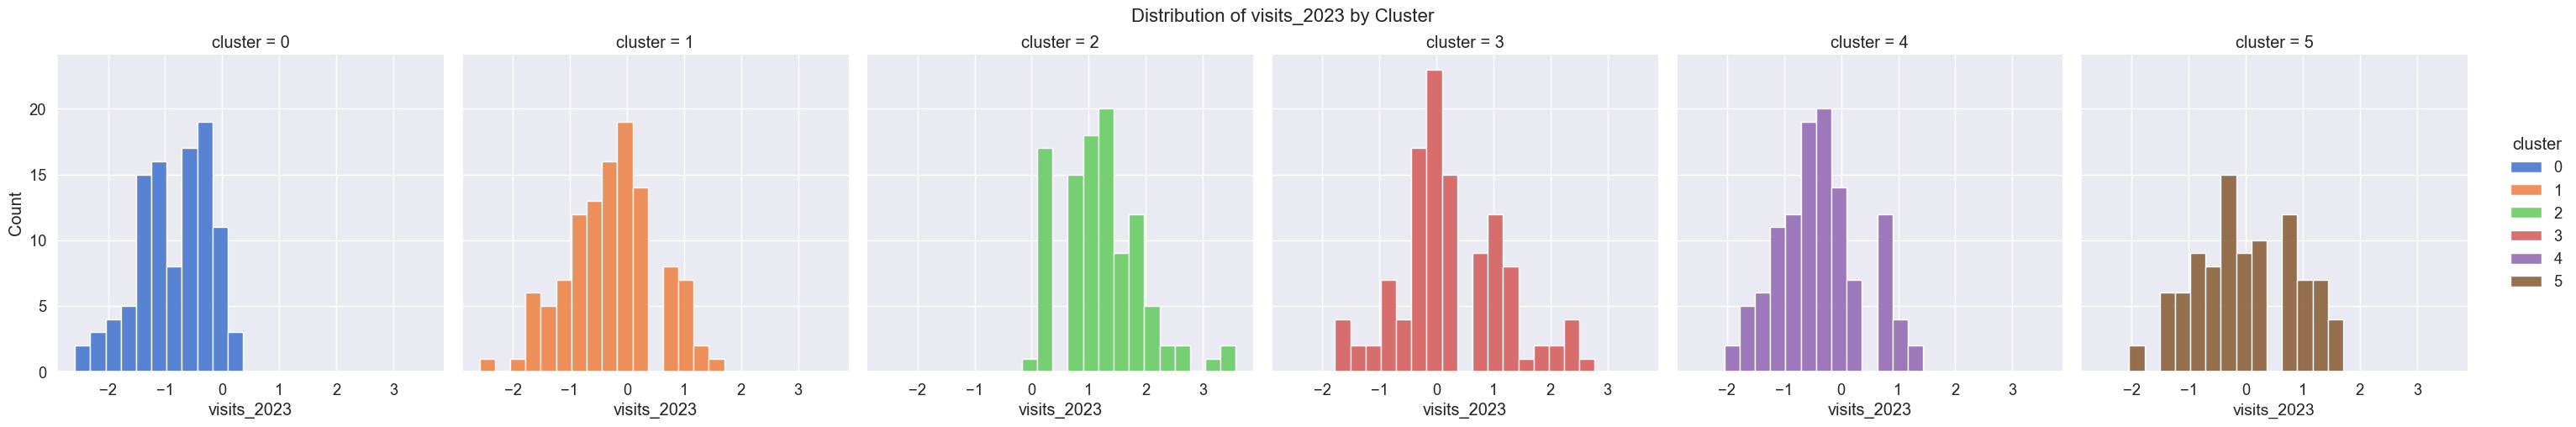

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


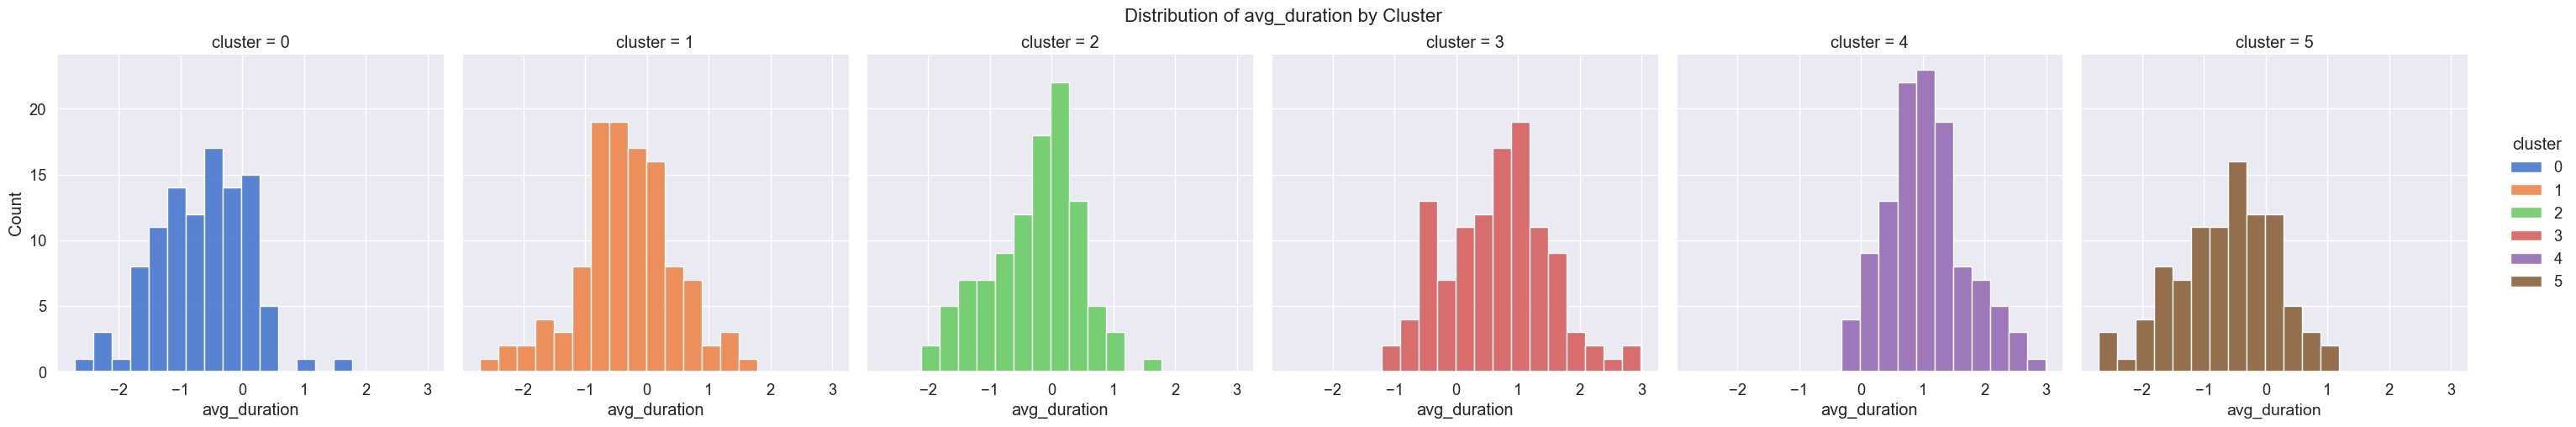

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


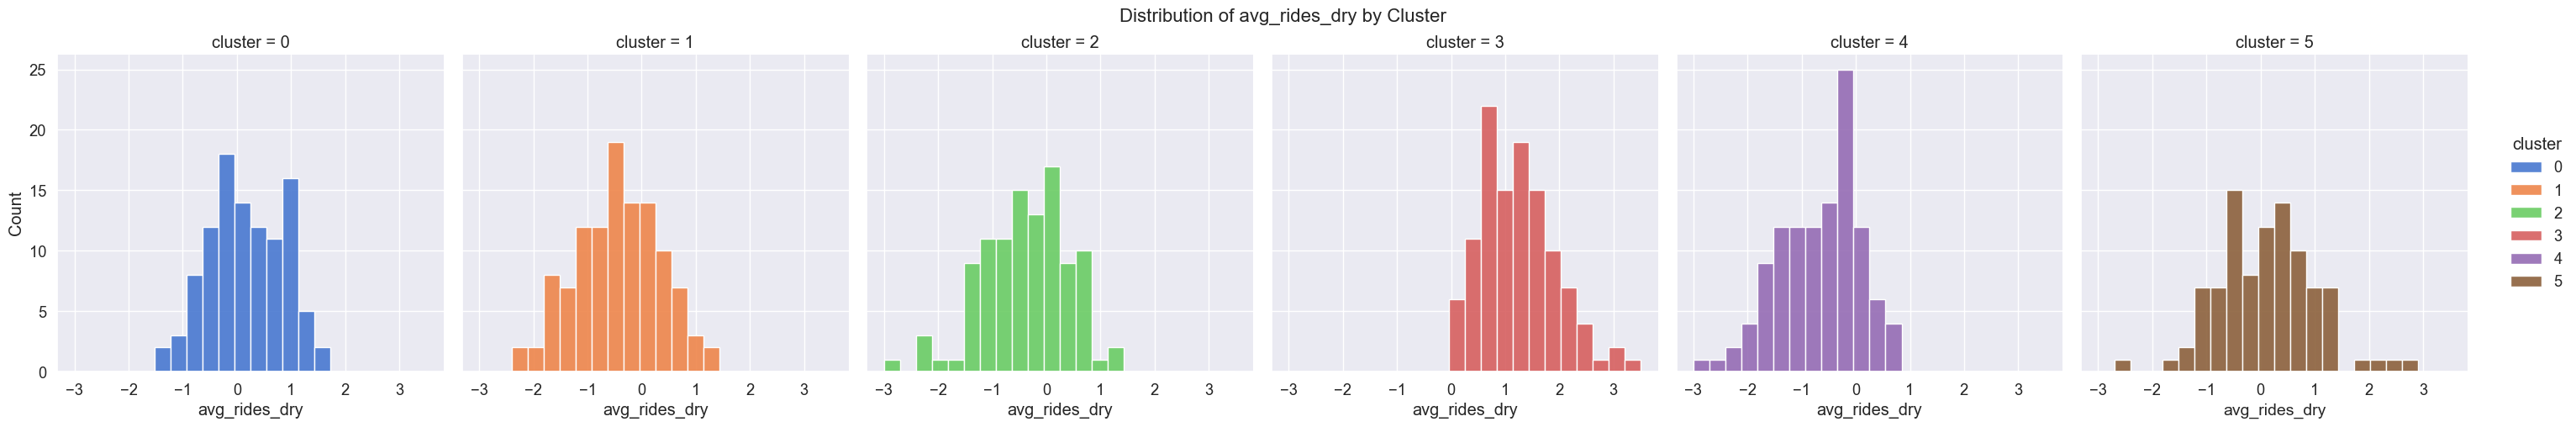

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


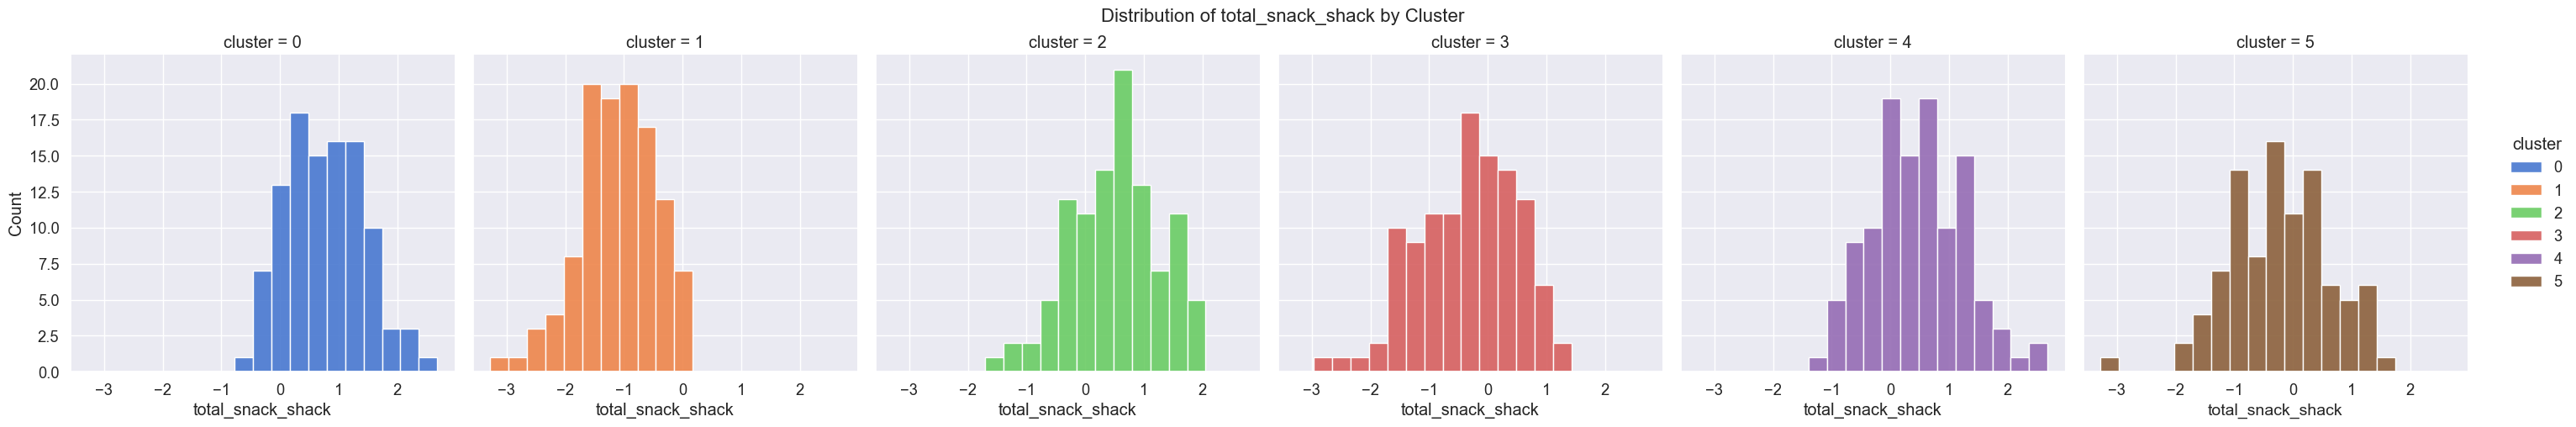

C:\Users\asusw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


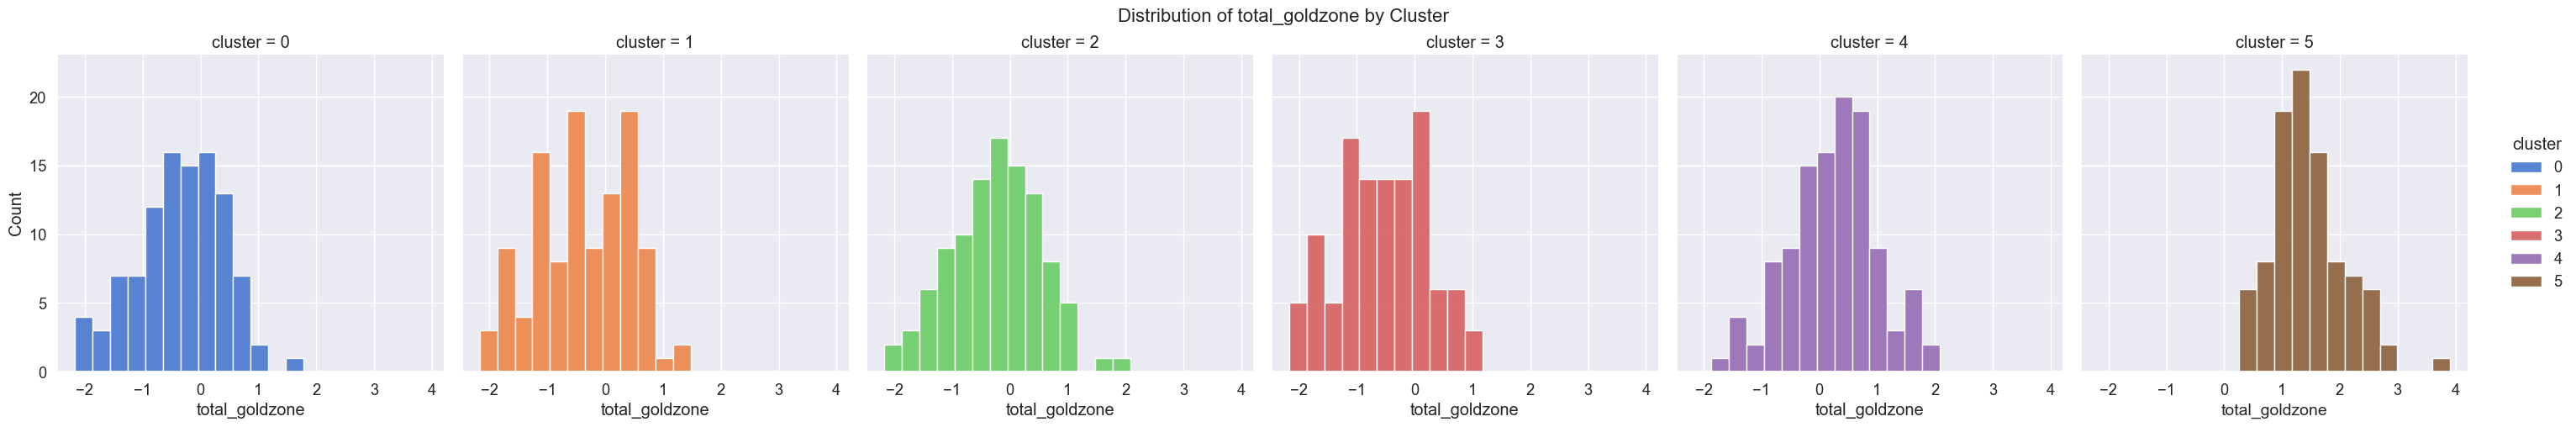

In [21]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set(font_scale=1.2)
for variable in variables:
    sns.displot(data = df3, x=variable, hue='cluster', kind='hist', palette = 'muted', alpha=0.9, col='cluster')
    plt.suptitle(f'Distribution of {variable} by Cluster', y=1.02, fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    
    plt.show()
    

> **💡Interpretation of Graphs💡-**
>
> **visit_2023 -** Cluster 1 & 2 have similar distribution with most visits in the range -1 to 1. They also have higher number of visits compared to other clusters. This cluster might include individuals who live close by or have seasonal passes. 
>
>**avg_duration -** Cluster 1 as the highest average duration, this could be due to family outings - they could have children who spend longer duration. While Cluster 0 have the lowest, indicating low engagement. Density goes upto 80, reflecting the number of instances within each average duration interval. Cluster 3 & 4 suggest moderate level of engagement. They probably spend more time socializing with their group.
>
>**avg_rides_dry -** Cluster 1 has the highest average number of dry rides and Cluster 2 has the lowest. Cluster 1 as mentioned above yound family with children who enjoy rides more.
>
>**total .nack shack -** Cluster 0 are the highest spendors in food and beverages. luster 1 and 2 appear to have similar spending patterns - low range they are probably on a budget. While Cluster 3, & 4 exhibit wider range of spending. They are definetly people who have a full time job / business.

##### Solution - K

> **💡Interpretation of Clusters💡-**
>
> **Cluster 0 (Snack Enthusiasts):**
>This cluster has the highest standardized value for spending at snack shack compared to other clusters. Fespite having below-average standardized values for visit frequency and duration, they allocate a significant portion of their spending to snack related purchases. 
>
>Capltilizing on this groups' affinity for snacks by offering a diverse range of food and beverage options within the park would be essential. Implementing targeted promotions for snack-related deals, combo offers, or loyalty programs to encourage repeate purchases is recommended. 
>
>**Cluster 1: Budget - Concious Families:**
> This cluster has slightly higher visit frequency compared to Cluster 0, but lower than average duration and spending - total_snack_shack and total_goldzone. This could indicate families visiting on a budget, aiming to maximize their experience within shorter durations and potentially managing expenses.
>
>This budget concious group might appreciate value-oriented promotions, such as familu season passes, bundled ticket packages with meals or early-bird discounts.
>
>**Cluster 2: Frequent "lazy" Visitors**
>This cluster shows highest standardized average visit frequency slightly but their focus seem to only be on total_snack_shack. This could be because of their frequent visits they have already explored the rides and are too lazy to put in efforts and are just in for food. 
>
> It is important to engage this group more because they are loyal customers and we don't want to loose their interest. You might want to consider running events that would attract this group into being more enthusistic about other offerings.
>
>**Cluster 3 - Thrill Seekers - Life of the Park**
>This cluster represent people who enjoy the rides the most. They are 2nd most frequennt visitors and have the 2nd highest average duration. This group seem to represent people who might be on a budget.
>
>You might want to try and attract them towards the food and beverages that lobsterland offers. By giving them dining discounts.
>
>**Cluster 4 - Weekend Warriors**
> They have 2nd highest standardized total_gold zone frequencies and total_snack_shack. They stay for the longest duration. They are least interested in dry rides. These customers are probably in for some weekend relaxation after a busy office week. 
>
>Reach out to these weekend warriors with targeted online advertising and promoting special weekend offers. Offer VIP passes for shorted wait time to increase ride engagement. Consider partnership with local hotels or transportations or small businesses that plan trips for groups to carter weekend getway packages that combine lobsterland experience with other tourist activities.
>
>**Cluster 5 - The Splurge Squad / VVIPs**
> They are the highest spenders- total_goldzone & 3rd highest visitors of 2023. They have the 2nd lowest standardized avg_duration. 
>
>Cater to these high spending VVIPs with exclusive VIP experience, priority access to rides. Partner with high-end brands and dinning for their luxurious preferences.

##### Solution - L

> **💡Winter “Off-season” period in its Email Campaign💡-**
>
>**Cluster 0 (Snack Enthusiasts):** Have email campaigns with exclusive snack-themed events.
>
>**Cluster 3 - Thrill Seekers - Life of the Park** Attract them with more engaging thrill seeking gamified events.
>
>**Cluster 4 - Weekend Warriors** Offer discounted packages.
>
> **Most Worthy of Outreach / Engagement Efforts**
>
>The group most worthy of outreach efforts is the **Snack Enthusiasts - Cluster 0**. With their high spending at the snack shack, they represent a significant revenue opportunity for Lobster Land during the off-season. Targeted email campaigns highlighting exclusive snack offerings, promotions, and loyalty programs can effectively engage this group and drive increased spending.
>
>**Least Worth of Outreach / Engagement Efforts**
>
> The grpup least worthy of outreach efforts is the **Frequent "Lazy" Visitors - Cluster 2** They are already frequent visitors so targeting them during off season is not required. Additionally, their focus seems to be primarily on snack related purchases - we need to target outreach efforts towards segments with higher revenue potential during the off-season.

#### Solution - II: Conjoint Analysis with a Linear Model

##### Solution - A

In [22]:
df_t = pd.read_csv("treasure_hunt.csv")

In [23]:
df_t.head()

,bundleID,narrative,duration,theme,reward_type,space_integration,collaboration,customization,participant_role,avg_rating
0,1,Simple,30,Pirate,Physical,Low,Solo,Standard,Explorer,4.730555
1,2,Simple,30,Pirate,Physical,Low,Solo,Standard,Detective,5.249414
2,3,Simple,30,Pirate,Physical,Low,Solo,Standard,Hero,8.530475
3,4,Simple,30,Pirate,Physical,Low,Solo,Dynamic,Explorer,5.880570
4,5,Simple,30,Pirate,Physical,Low,Solo,Dynamic,Detective,6.145922


In [24]:
df_t.tail()

,bundleID,narrative,duration,theme,reward_type,space_integration,collaboration,customization,participant_role,avg_rating
1939,1940,Complex,90,Space Odyssey,Digital,High,Team,Standard,Detective,6.517988
1940,1941,Complex,90,Space Odyssey,Digital,High,Team,Standard,Hero,8.900880
1941,1942,Complex,90,Space Odyssey,Digital,High,Team,Dynamic,Explorer,4.742161
1942,1943,Complex,90,Space Odyssey,Digital,High,Team,Dynamic,Detective,8.659833
1943,1944,Complex,90,Space Odyssey,Digital,High,Team,Dynamic,Hero,7.795414


In [25]:
df_t.isnull().values.any()

False

##### Solution - B

In [26]:
# Categorical / Numerical variable
df_t.describe()

,bundleID,duration,avg_rating
count,1944.000000,1944.0000,1944.000000
mean,972.500000,60.0000,6.648504
std,561.328781,24.5012,1.521191
min,1.000000,30.0000,0.896402
25%,486.750000,30.0000,5.628420
50%,972.500000,60.0000,6.694549
75%,1458.250000,90.0000,7.730727
max,1944.000000,90.0000,9.947405


> **💡Interpretation of Results💡-**
>
> **Numeric**
>
>**avg_rating** This variable represents the average rating on a scale of 0-10, which has a valid mathematical meaning and can be used for calculations.
>
>**Categorical**
>
>**bundleID** is a unique identifier for ach bundle and does not represent any meaningful numeric value.
>
>**duration**  This variable represent treasure hunt duration 30 min, 60  min or 90 min. Its not continuous in nature and doesn't have meaningful mathematic representation between the values.
>
>**narative, theme, reward type, space_integration, collaboration, customization, participant role** are all categorical in nature.
>
>The dataset contains 1 numeric variable **avg_rating** ,  while all other variables are categorical in nature. 

##### Solution - C

In [27]:
# Drop the "bundleID" variable
df_t = df_t.drop("bundleID", axis=1)

In [28]:
# Dummify all variables
df_t1 = pd.get_dummies(df_t, drop_first=True, columns = ["duration", "narrative", "theme", "reward_type", "space_integration", "collaboration", "customization", "participant_role"])

df_t1.head()

,avg_rating,duration_60,duration_90,narrative_Moderate,narrative_Simple,theme_Pirate,theme_Space Odyssey,reward_type_Physical,space_integration_Low,space_integration_Medium,collaboration_Team,customization_Standard,participant_role_Explorer,participant_role_Hero
0,4.730555,False,False,False,True,True,False,True,True,False,False,True,True,False
1,5.249414,False,False,False,True,True,False,True,True,False,False,True,False,False
2,8.530475,False,False,False,True,True,False,True,True,False,False,True,False,True
3,5.880570,False,False,False,True,True,False,True,True,False,False,False,True,False
4,6.145922,False,False,False,True,True,False,True,True,False,False,False,False,False


> **💡Interpretation💡-**
>
> It is important to have numeric variables based on survey data be dummified because 'Duration' for example here is a numeric input but is categorical in nature. It helps in avoiding misrepresentation of data and prevent bias- allowing the algorithm to treat it equally and independently. It allows it to capture non-linear preferences more accurately. 

##### Solution - D

In [29]:
df_t1.columns

Index(['avg_rating', 'duration_60', 'duration_90', 'narrative_Moderate',
       'narrative_Simple', 'theme_Pirate', 'theme_Space Odyssey',
       'reward_type_Physical', 'space_integration_Low',
       'space_integration_Medium', 'collaboration_Team',
       'customization_Standard', 'participant_role_Explorer',
       'participant_role_Hero'],
      dtype='object')

In [35]:
X = df_t1[['duration_60', 'duration_90', 'narrative_Moderate',
       'narrative_Simple', 'theme_Pirate', 'theme_Space Odyssey',
       'reward_type_Physical', 'space_integration_Low',
       'space_integration_Medium', 'collaboration_Team',
       'customization_Standard', 'participant_role_Explorer',
       'participant_role_Hero']]

y = df_t1['avg_rating']

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X,y)

regressor.intercept_

6.5397432736344605

> **💡Interpretation💡-**
>
>The regressor.intercept resulted is 6.5397432736344605. Its represents the predicted value of the dependent variable when all independent variables are set to 0. 

##### Solution - E

In [38]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
duration_60,1.136713
duration_90,0.809601
narrative_Moderate,-0.170835
narrative_Simple,-0.182459
theme_Pirate,0.317195
theme_Space Odyssey,-0.520975
reward_type_Physical,-0.515640
space_integration_Low,-0.169976
space_integration_Medium,-0.130009
collaboration_Team,0.166483


##### Solution - F

> **💡Interpretation of Conjoint Analysis💡-**
>
> **Duration -** While the model doesm't show a strong preference for any specific duration, it suggests that both 60- minutes (1.14) and 90-minute (0.81) options might be slightly more popular than the 30 - minute option.
>
>**Theme -** **Space Odyssey** appears to be least preferred theme (-0.52) compared to **Pirate** (0.317195) and **Jungle Adventure** (not shown but assumed to have a coefficient close to 0 since it was dropped as the 1st level in dummy coding).
>
>**Reward Type -** Interestingly **Pysical Rewards** (-0.515640) seem to be less preferred than digital rewards. This is might be a concern to have a look at maybe carrying physical prizes is too burdensome or maybe the prizes are not very attractive.
>
>**Collaboration -** There is slight indication that **team based collaboration** (0.166483) is more popular than solo play (baseline). This suggests that the players have competitive spirit and prefer to collaborate with other players.
>
>**Participant Role -** **Hero** (0.212881) appears to be most preferred participant role compared to **Explorer (-0.029524)** & **Detective**. This suggests to have more superhero type games available.
>
> It is necessary to not just go with just most popular options and consider the trade-offs, potential interactions, and real world feasibility of each feature. This will make the AR treasure hunt more popular.  Like gamification of elements - like leveling up there hero characters & have points system which can be stored to encourage repeat future visits.

#### Solution - III: Wildcard: Marketing & Segments

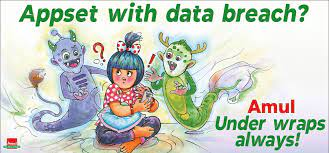

> **💡Findings💡-**
>
> **Amul's Advertisement tageting Data security concerns**
Data privacy has become a hot topic of debate on the internet.Amul well known in India for its creative cartoon advertisement with famous Amul girl, highlights its concerns on online data security in social apps through moment marketing ads. One such ad came with a tagline of ‘Appset with data breach?’. It shows Amul girl hiding her phone from internet ‘monsters’.
>
>In this advertisement Amul cleverly leverages a psychographic segmentstion approach. This threat is targeted towards younger generation the GenZ and below who are more digitally active, also the concerned parents. 
>
>This add can be considered differentiated as it taps into a specific consumer concern rather than simply promoting the Amul brand in a generic way. The playfulness of the add, while acknowledging a serious issue, makes it memorable and potentially effective in raising awareness about data security, even for those outside the specific segment.
>
>I am not GenZ  nor am I a parent, I don't exactly fall into this segment. But I am a loyal fan of Amul's cartoon advertisements add also their products.